# Neural & Behavioral Modeling - Week 13 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [ ]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from time import sleep
from mpl_toolkits.mplot3d import Axes3D

## 1. Reinforcement Learning

### 1.1 Temporal Difference Learning

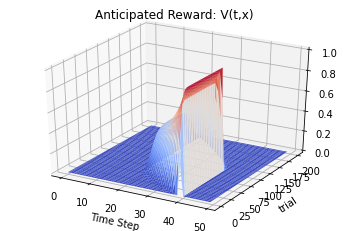

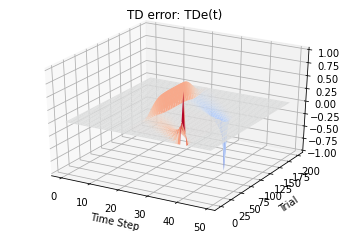

In [ ]:
# Simulating the DA neuron responses:

a=0.3 # set learning rate
r=0.95 # temporal discounting
nTrials=200; # set number of trials
nTimes=50; # set number of time steps per trial
qTime=20; # set time of cue
rTime=40; # set time of reward

X=zeros(nTimes) # input vector 
X[qTime:rTime]=1 # binary status: 0=None; 1=Yes
R=zeros(nTimes)  # reward vector
R[rTime]=1 # binary status: 0=None; 1=Yes
V=zeros(nTimes) # value function V(X(t))
TDe=zeros(nTimes) # define prediction unit vector
V_history=zeros([nTrials,nTimes])
TDe_history=zeros([nTrials,nTimes])

for c in range(nTrials): # for each learning trial
    if(c==nTrials/2): R[rTime]=0 # remove reward for later trials
    for t in range(1,nTimes):
        TDe[t]=R[t]+r*V[t]-V[t-1] # TD error
        V[t-1]=V[t-1]+a*X[t-1]*TDe[t] # TD learning: V(X(t))
        #V[t-1]=V[t-1]+a*TDe[t] # TD learning: V(t)

    V_history[c,:]=V # save learned V(t) across trials
    TDe_history[c,:]=TDe # save learned TDe(t) across trials

# plot the results:
fig1=figure()
ax1=fig1.add_subplot(111, projection='3d')
[X,Y]=meshgrid(range(nTimes),range(nTrials))
#ax1.view_init(30, 30)
ax1.plot_surface(X,Y,V_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('trial');
title('Anticipated Reward: V(t,x)');

fig2=figure(2);
ax2=fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X,Y,TDe_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('Trial')
title('TD error: TDe(t)');

### 1.2 Q Learning
See "<a href="https://blog.csdn.net/bornfree5511/article/details/103816690">A Painless Q-Learning Tutorial</a>" for more information.
<img src=https://pic1.xuehuaimg.com/proxy/csdn/https://pic1.xuehuaimg.com/proxy/csdn/https://img-blog.csdn.net/20130717235436015>

In [ ]:
# Codes adapted from https://gist.github.com/kastnerkyle/d127197dcfdd8fb888c2

# defines the reward/connection graph
r = np.array([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]]).astype("float32")

q = np.zeros_like(r)

def update_q(state, next_state, action, alpha, gamma):
    rsa = r[state, action]
    qsa = q[state, action]
    new_q = qsa + alpha * (rsa + gamma * max(q[next_state, :]) - qsa) # The learning rule!
    q[state, action] = new_q
    # renormalize row to be between 0 and 1
    rn = q[state][q[state] > 0] / np.sum(q[state][q[state] > 0])
    q[state][q[state] > 0] = rn
    return r[state, action]


def show_traverse():
    # show all the greedy traversals
    for i in range(len(q)):
        current_state = i
        traverse = "%i -> " % current_state
        n_steps = 0
        while current_state != 5 and n_steps < 20:
            next_state = np.argmax(q[current_state])
            current_state = next_state
            traverse += "%i -> " % current_state
            n_steps = n_steps + 1
        # cut off final arrow
        traverse = traverse[:-4]
        print("Greedy traversal for starting state %i: %s" % (i, traverse))

# Core algorithm
gamma = 0.8
alpha = 1.
n_episodes = 1E3
n_states = 6
n_actions = 6
epsilon = 1
random_state = np.random.RandomState(1999)
for e in range(int(n_episodes)):
    states = list(range(n_states))
    random_state.shuffle(states)
    current_state = states[0]
    goal = False
    counter=0
    while not goal:
        counter+=1
        # epsilon greedy
        valid_moves = r[current_state] >= 0
        if random_state.rand() < epsilon: # Exploration:
            actions = np.array(list(range(n_actions)))
            actions = actions[valid_moves == True]
            if type(actions) is int:
                actions = [actions]
            random_state.shuffle(actions)
            action = actions[0]
            next_state = action
        else: # Exploitation:
            if np.sum(q[current_state]) > 0:
                action = np.argmax(q[current_state]) # Best action
            else:
                # Don't allow invalid moves at the start
                # Just take a random move
                actions = np.array(list(range(n_actions)))
                actions = actions[valid_moves == True]
                random_state.shuffle(actions)
                action = actions[0]
            next_state = action
        reward = update_q(current_state, next_state, action,
                          alpha=alpha, gamma=gamma)
        # Goal state has reward 100
        if reward > 1:
            goal = True
        current_state = next_state

print(r)
print(counter)
print(q)
show_traverse()

[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]
8
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 2.7404628e-03 0.0000000e+00
  9.9725950e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 1.1692802e-01 4.0987301e-01 0.0000000e+00 4.7319901e-01
  0.0000000e+00]
 [4.3065412e-11 0.0000000e+00 0.0000000e+00 3.6904407e-11 0.0000000e+00
  1.0000000e+00]
 [0.0000000e+00 2.4500578e-03 0.0000000e+00 0.0000000e+00 4.3841316e-03
  9.9316579e-01]]
Greedy traversal for starting state 0: 0 -> 4 -> 5
Greedy traversal for starting state 1: 1 -> 5
Greedy traversal for starting state 2: 2 -> 3 -> 4 -> 5
Greedy traversal for starting state 3: 3 -> 4 -> 5
Greedy traversal for starting state 4: 4 -> 5
Greedy travers